In [28]:
! pip install pycaret streamlit pyvirtualdisplay pandas

In [29]:
import streamlit as st
import pycaret.classification as pc
import pycaret.regression as pr
import pandas as pd
import sqlite3
import json
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline



# Set the background color to light coffee
st.markdown(
    """
    <style>
    body {
        background-color: #f3e0c6;
    }
    </style>
    """,
    unsafe_allow_html=True
)

# Create a Streamlit app
st.title("PyCaret Streamlit App")

# Sidebar for dataset input and configuration
st.sidebar.header("Dataset Configuration")

# Ask the user to provide the dataset type
dataset_type = st.sidebar.selectbox("Select the type of dataset", ["CSV", "Excel", "SQL", "JSON"])


In [30]:
import pycaret.classification as pc
from pycaret.classification import setup
import pandas as pd
import sqlite3
import json

# Ask the user to provide the dataset type
dataset_type = input("Enter the type of dataset (CSV, Excel, SQL, or JSON): ").lower()

# Load the dataset based on the provided type
if dataset_type == 'csv':
    dataset_path = input("Enter the path to your CSV dataset: ")
    data = pd.read_csv(dataset_path)
elif dataset_type == 'excel':
    dataset_path = input("Enter the path to your Excel dataset: ")
    data = pd.read_excel(dataset_path)
elif dataset_type == 'sql':
    db_path = input("Enter the path to your SQLite database: ")
    conn = sqlite3.connect(db_path)
    query = input("Enter your SQL query to fetch the data: ")
    data = pd.read_sql_query(query, conn)
    conn.close()
elif dataset_type == 'json':
    dataset_path = input("Enter the path to your JSON dataset: ")
    with open(dataset_path, 'r') as json_file:
        json_data = json.load(json_file)
        data = pd.DataFrame(json_data)
else:
    print("Unsupported dataset type. Please provide CSV, Excel, SQL, or JSON.")
    exit()



Enter the type of dataset (CSV, Excel, SQL, or JSON): csv
Enter the path to your CSV dataset: /content/sample_data/heart.csv


In [ ]:
# Display column names and data types
print("Column Names and Data Types:")
print(data.dtypes)

Column Names and Data Types:
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


In [31]:
# Ask the user for columns to drop
columns_to_drop = input("Enter columns to drop (comma-separated): ").split(',')
data.drop(columns=columns_to_drop, inplace=True)

# Handle missing values based on user input
for col in data.columns:
    if data[col].dtype == 'object':
        # Handle categorical columns
        fill_method = input(f"What to do with missing values in '{col}' (most_frequent / additional_class / skip): ").strip()
        if fill_method == 'most_frequent':
            data[col].fillna(data[col].mode()[0], inplace=True)
        elif fill_method == 'additional_class':
            data[col].fillna('Missing', inplace=True)
    else:
        # Handle numeric (continuous) columns
        fill_method = input(f"What to do with missing values in '{col}' (mean / median / mode / skip): ").strip()
        if fill_method == 'mean':
            data[col].fillna(data[col].mean(), inplace=True)
        elif fill_method == 'median':
            data[col].fillna(data[col].median(), inplace=True)
        elif fill_method == 'mode':
            data[col].fillna(data[col].mode()[0], inplace=True)


Enter columns to drop (comma-separated): sex
What to do with missing values in 'age' (mean / median / mode / skip): skip
What to do with missing values in 'cp' (mean / median / mode / skip): skip
What to do with missing values in 'trtbps' (mean / median / mode / skip): skip
What to do with missing values in 'chol' (mean / median / mode / skip): skip
What to do with missing values in 'fbs' (mean / median / mode / skip): skip
What to do with missing values in 'restecg' (mean / median / mode / skip): skip
What to do with missing values in 'thalachh' (mean / median / mode / skip): skip
What to do with missing values in 'exng' (mean / median / mode / skip): v
What to do with missing values in 'oldpeak' (mean / median / mode / skip): skip
What to do with missing values in 'slp' (mean / median / mode / skip): skip
What to do with missing values in 'caa' (mean / median / mode / skip): skip
What to do with missing values in 'thall' (mean / median / mode / skip): skip
What to do with missing val

In [32]:
import pycaret.regression as pr

# Initialize PyCaret with the dataset
target_column_name = input("Enter the name of the target column: ")
clf = pc.setup(data, target=target_column_name, session_id=123, normalize=True, transformation=True)

# Handle missing values
data.dropna(inplace=True)  # Remove rows with missing values, you can customize this based on your needs

# classification or regression
if data[target_column_name].dtype in ['int64', 'float64']:
    # Assuming it's regression if the target column contains numerical values
    task_type = 'regression'
else:
    # Assuming it's classification if the target column contains non-numerical values
    task_type = 'classification'

print(f"Detected task type: {task_type}")

if task_type == 'classification':
    clf = pc.setup(data, target=target_column_name, session_id=123, normalize=True, transformation=True)
    # Perform classification tasks using PyCaret
    best_model = pc.compare_models()
    # Rest of your classification-related code...
elif task_type == 'regression':
    reg = pr.setup(data, target=target_column_name, session_id=123, normalize=True, transformation=True)
    # Perform regression tasks using PyCaret
    best_model = pr.compare_models()
    # Rest of your regression-related code...
else:
    print("Unsupported task type. Please check the target column data type.")
    exit()


Enter the name of the target column: cp


,Description,Value
0,Session id,123
1,Target,cp
2,Target type,Multiclass
3,Original data shape,"(303, 13)"
4,Transformed data shape,"(303, 13)"
5,Transformed train set shape,"(212, 13)"
6,Transformed test set shape,"(91, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


Detected task type: regression


,Description,Value
0,Session id,123
1,Target,cp
2,Target type,Regression
3,Original data shape,"(303, 13)"
4,Transformed data shape,"(303, 13)"
5,Transformed train set shape,"(212, 13)"
6,Transformed test set shape,"(91, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.7321,0.8174,0.8910,0.2417,0.4666,0.3715,0.0580
ridge,Ridge Regression,0.7221,0.8265,0.8952,0.2338,0.4710,0.3688,0.1180
lr,Linear Regression,0.7220,0.8273,0.8956,0.2331,0.4714,0.3688,0.6840
lar,Least Angle Regression,0.7220,0.8273,0.8956,0.2331,0.4714,0.3688,0.0660
knn,K Neighbors Regressor,0.7153,0.8227,0.9009,0.2249,0.4697,0.4051,0.0660
huber,Huber Regressor,0.7223,0.8444,0.9061,0.2157,0.4774,0.3821,0.0690
et,Extra Trees Regressor,0.7220,0.8848,0.9282,0.1708,0.4860,0.4205,0.3690
rf,Random Forest Regressor,0.7450,0.8888,0.9362,0.1616,0.4877,0.3854,0.3090
ada,AdaBoost Regressor,0.8010,0.9292,0.9579,0.1261,0.5032,0.3653,0.1760
lightgbm,Light Gradient Boosting Machine,0.7937,0.9575,0.9703,0.0993,0.5053,0.4282,0.3890


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [33]:
# Perform any desired data preprocessing and model training using PyCaret's functions
best_model = pc.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5143,0.6789,0.5143,0.4616,0.4613,0.2183,0.2372,0.1420
lightgbm,Light Gradient Boosting Machine,0.5050,0.6962,0.5050,0.4664,0.4802,0.2192,0.2228,0.2580
xgboost,Extreme Gradient Boosting,0.5045,0.6876,0.5045,0.4586,0.4747,0.2137,0.2200,0.1720
lda,Linear Discriminant Analysis,0.4994,0.6964,0.4994,0.4908,0.4834,0.2237,0.2302,0.1470
ridge,Ridge Classifier,0.4950,0.0000,0.4950,0.4335,0.4504,0.1896,0.2027,0.0640
nb,Naive Bayes,0.4903,0.6847,0.4903,0.4806,0.4706,0.2234,0.2314,0.1360
lr,Logistic Regression,0.4851,0.6916,0.4851,0.4496,0.4588,0.1937,0.2010,0.0740
et,Extra Trees Classifier,0.4771,0.6783,0.4771,0.4130,0.4382,0.1614,0.1660,0.2940
rf,Random Forest Classifier,0.4766,0.6837,0.4766,0.3848,0.4225,0.1433,0.1510,0.2730
dummy,Dummy Classifier,0.4719,0.5000,0.4719,0.2227,0.3026,0.0000,0.0000,0.0610


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [34]:
from pycaret.classification import setup, compare_models, tune_model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# Perform feature selection (you can choose a different method)
best_features = compare_models(fold=5, sort='F1')

# Create a custom pipeline with feature selection and Logistic Regression
pipeline = Pipeline([
    ('select', SelectKBest(score_func=f_classif)),
    ('lr', LogisticRegression())
])

# Define a custom grid for hyperparameter tuning
param_grid = {
    'select__k': [1, 2, 3, 4, 5],  # Adjust the number of selected features
    'lr__C': [0.001, 0.01, 0.1, 1, 10],  # Adjust regularization strength
}

# Tune the custom pipeline with the custom grid
tuned_lr = tune_model(pipeline, custom_grid=param_grid)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5002,0.6943,0.5002,0.4771,0.4794,0.2445,0.2492,0.1240
ridge,Ridge Classifier,0.5047,0.0000,0.5047,0.4488,0.4675,0.2099,0.2165,0.0660
lda,Linear Discriminant Analysis,0.4813,0.6895,0.4813,0.4621,0.4668,0.2009,0.2044,0.0680
lightgbm,Light Gradient Boosting Machine,0.4905,0.6728,0.4905,0.4442,0.4635,0.1951,0.1983,0.5780
knn,K Neighbors Classifier,0.5138,0.6624,0.5138,0.4465,0.4634,0.2142,0.2271,0.2520
xgboost,Extreme Gradient Boosting,0.4811,0.6889,0.4811,0.4576,0.4622,0.1867,0.1898,0.3020
lr,Logistic Regression,0.4761,0.6837,0.4761,0.4427,0.4525,0.1832,0.1882,0.1620
gbc,Gradient Boosting Classifier,0.4814,0.6659,0.4814,0.4305,0.4517,0.1797,0.1836,0.4580
rf,Random Forest Classifier,0.4905,0.6785,0.4905,0.4292,0.4513,0.1743,0.1802,0.2760
svm,SVM - Linear Kernel,0.4384,0.0000,0.4384,0.4447,0.4283,0.1574,0.1620,0.0760


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.6732,0.5000,0.4091,0.4394,0.2244,0.2495
1,0.6364,0.8128,0.6364,0.5227,0.5606,0.4359,0.4847
2,0.5714,0.6772,0.5714,0.4632,0.5014,0.3127,0.3417
3,0.5238,0.7036,0.5238,0.4656,0.4779,0.2473,0.2766
4,0.6667,0.7530,0.6667,0.5159,0.5801,0.4494,0.4811
5,0.5238,0.6641,0.5238,0.5302,0.4794,0.2391,0.2929
6,0.5714,0.7054,0.5714,0.5306,0.5076,0.3415,0.4096
7,0.4762,0.5949,0.4762,0.3730,0.4173,0.1348,0.1433
8,0.4762,0.6601,0.4762,0.4921,0.4337,0.2062,0.2617


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5455,0.7168,0.5455,0.5579,0.5433,0.3125,0.3136
1,0.5909,0.7912,0.5909,0.5268,0.5505,0.3529,0.3629
2,0.4286,0.6566,0.4286,0.3684,0.3851,0.1032,0.1108
3,0.4286,0.6725,0.4286,0.4141,0.4195,0.1064,0.1068
4,0.6190,0.8104,0.6190,0.4929,0.5485,0.3731,0.3955
5,0.6190,0.7470,0.6190,0.6310,0.6141,0.4043,0.4147
6,0.4286,0.7088,0.4286,0.4246,0.4232,0.1340,0.1364
7,0.5238,0.6583,0.5238,0.4286,0.4540,0.2045,0.2246
8,0.3333,0.6007,0.3333,0.3107,0.3175,-0.0769,-0.0787


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

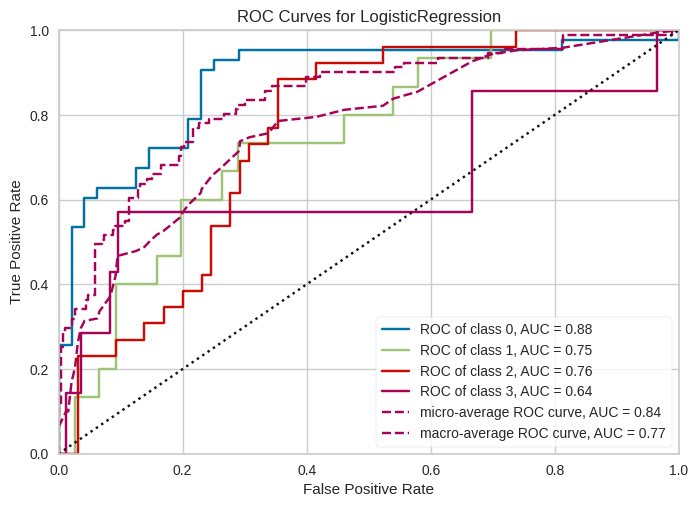

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.7647,0.5000,0.4470,0.4711,0.2244,0.2278
1,0.4091,0.7333,0.4091,0.2557,0.3147,0.0205,0.0230
2,0.5714,0.6819,0.5714,0.4490,0.5000,0.2759,0.2942
3,0.4286,0.6698,0.4286,0.3407,0.3789,0.0562,0.0580
4,0.6190,0.7976,0.6190,0.4762,0.5333,0.3412,0.3821
5,0.6667,0.7436,0.6667,0.5678,0.6108,0.4324,0.4476
6,0.4286,0.6399,0.4286,0.3605,0.3916,0.0769,0.0787
7,0.3333,0.5930,0.3333,0.2612,0.2900,-0.1094,-0.1155
8,0.3333,0.5646,0.3333,0.2517,0.2857,-0.0970,-0.1026


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

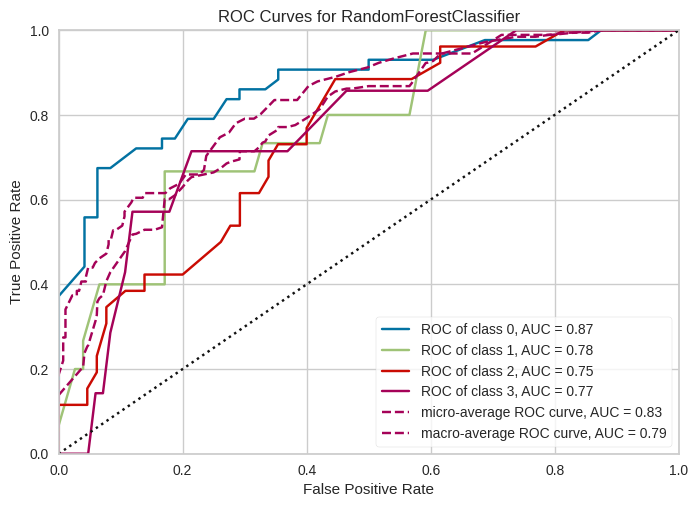

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5455,0.7238,0.5455,0.5857,0.5464,0.2949,0.3025
1,0.5000,0.7461,0.5000,0.4074,0.4424,0.1987,0.2079
2,0.5238,0.6341,0.5238,0.5054,0.5034,0.2364,0.2413
3,0.3810,0.6557,0.3810,0.3254,0.3506,0.0000,0.0000
4,0.6667,0.8388,0.6667,0.5338,0.5925,0.4515,0.4785
5,0.5714,0.7148,0.5714,0.5397,0.5514,0.3000,0.3039
6,0.4762,0.7030,0.4762,0.4459,0.4603,0.1923,0.1944
7,0.4286,0.4916,0.4286,0.3810,0.4000,0.1032,0.1061
8,0.3810,0.6651,0.3810,0.3413,0.3552,0.0353,0.0360


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

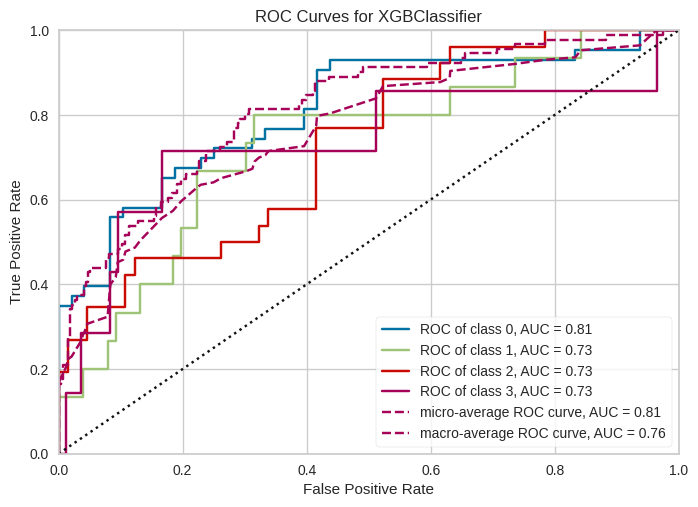

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5909,0.7518,0.5909,0.6158,0.5792,0.3529,0.3684
1,0.5455,0.7905,0.5455,0.4740,0.4924,0.2667,0.2805
2,0.5238,0.6583,0.5238,0.5054,0.5034,0.2364,0.2413
3,0.3810,0.6645,0.3810,0.3254,0.3506,0.0000,0.0000
4,0.6667,0.8224,0.6667,0.5102,0.5769,0.4324,0.4714
5,0.6667,0.7507,0.6667,0.6074,0.6291,0.4411,0.4535
6,0.4762,0.7056,0.4762,0.4255,0.4493,0.1809,0.1830
7,0.4286,0.6406,0.4286,0.3594,0.3909,0.0769,0.0787
8,0.4286,0.6103,0.4286,0.3810,0.4026,0.0870,0.0885


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

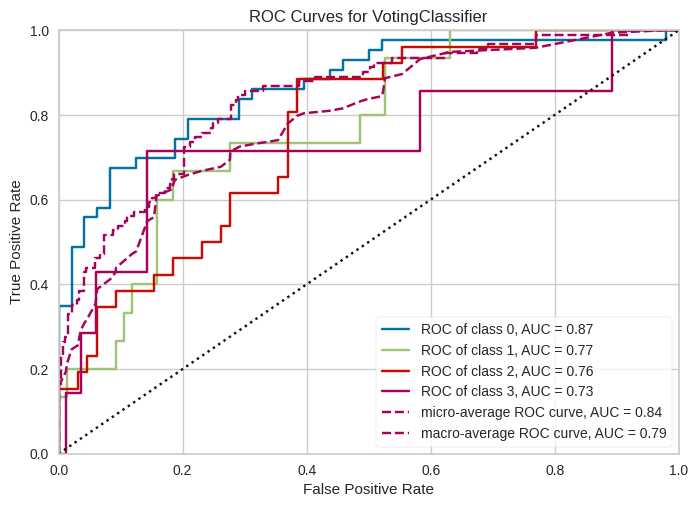

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4091,0.6601,0.4091,0.3953,0.4004,0.1118,0.1122
1,0.4545,0.7322,0.4545,0.2674,0.3367,0.0833,0.0982
2,0.5714,0.6688,0.5714,0.5442,0.5349,0.2948,0.3110
3,0.4286,0.6825,0.4286,0.3293,0.3694,0.0418,0.0441
4,0.4286,0.7553,0.4286,0.3847,0.4054,0.1000,0.1012
5,0.4762,0.6584,0.4762,0.4327,0.4336,0.1600,0.1698
6,0.4762,0.7094,0.4762,0.4102,0.4399,0.1661,0.1696
7,0.4762,0.5082,0.4762,0.3393,0.3868,0.1012,0.1160
8,0.3333,0.6358,0.3333,0.2912,0.3056,-0.0929,-0.0961


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

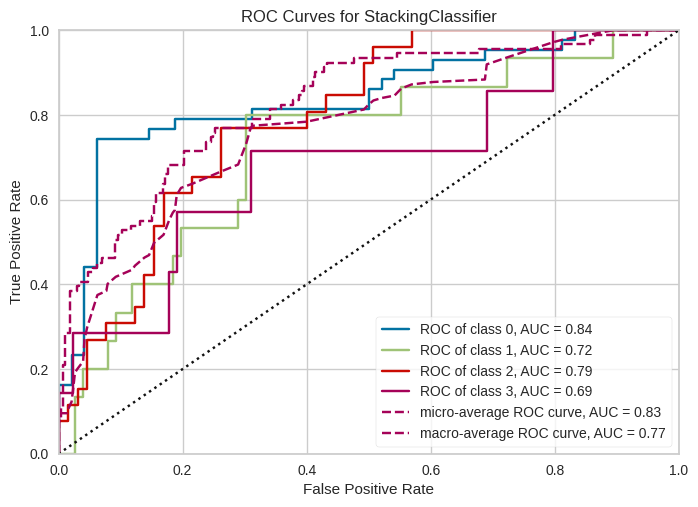

In [35]:
# Create and train multiple classification models
model1 = pc.create_model('lr')
plot_model(model1)

model2 = pc.create_model('rf')
plot_model(model2)

model3 = pc.create_model('xgboost')
plot_model(model3)

# Blend the classification models
blended_model = pc.blend_models(estimator_list=[model1, model2, model3])
plot_model(blended_model)

# Stack the classification models
stacked_model = pc.stack_models(estimator_list=[model1, model2], meta_model=model3)
plot_model(stacked_model)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5909,0.7358,0.5909,0.6158,0.5792,0.3529,0.3684
1,0.5455,0.7980,0.5455,0.4740,0.4924,0.2667,0.2805
2,0.5238,0.6428,0.5238,0.5054,0.5034,0.2364,0.2413
3,0.3810,0.6575,0.3810,0.3254,0.3506,0.0000,0.0000
4,0.6667,0.8276,0.6667,0.5102,0.5769,0.4324,0.4714
5,0.6190,0.7504,0.6190,0.5556,0.5844,0.3684,0.3736
6,0.4762,0.7030,0.4762,0.4255,0.4493,0.1809,0.1830
7,0.4286,0.6451,0.4286,0.3594,0.3909,0.0769,0.0787
8,0.4286,0.6113,0.4286,0.3810,0.4026,0.0870,0.0885


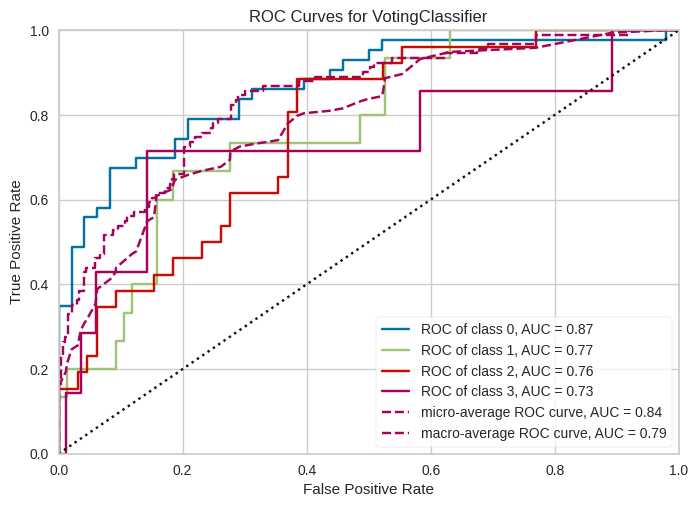

In [36]:
from pycaret.classification import tune_model

# Tune the model using the 'random' tuner without specifying a search library
tuned_model = tune_model(blended_model, n_iter=10)
plot_model(tuned_model)


In [37]:
from pycaret.classification import evaluate_model

evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### Testing Streamlit

In [ ]:
import streamlit as st

st.write("Hello, Streamlit!")


In [39]:
!cd /content/sample_data

In [ ]:
!streamlit run --browser.gatherUsageStats false pycaret_me_project.py



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.168.133.227:8501

  Stopping...
  Stopping...
